In [1]:
import numpy as np # diziler ve matrisler
import pandas as pd # veri analizi ve manipülasyonu 

import matplotlib.pyplot as plt #grafik çizimleri 
from sklearn import metrics #makine öğrenimi

import seaborn as sns # veri görselleştirme
import tensorflow as tf #derin öğrenme
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('cardioActivities.csv', delimiter=",")
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      508 non-null    object 
 1   Activity Id               508 non-null    object 
 2   Type                      508 non-null    object 
 3   Route Name                1 non-null      object 
 4   Distance (km)             508 non-null    float64
 5   Duration                  508 non-null    object 
 6   Average Pace              508 non-null    object 
 7   Average Speed (km/h)      508 non-null    float64
 8   Calories Burned           508 non-null    float64
 9   Climb (m)                 508 non-null    int64  
 10  Average Heart Rate (bpm)  294 non-null    float64
 11  Friend's Tagged           0 non-null      float64
 12  Notes                     231 non-null    object 
 13  GPX File                  504 non-null    object 
dtypes: float64

(508, 14)

In [3]:
dataset.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


In [4]:
df = pd.DataFrame(dataset)
df

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2012-08-28 07:06:57,f5218490-a372-44c8-bb20-de3b91984cbe,Walking,NaN,1.57,13:39,8:41,6.91,926743.0,7,NaN,NaN,NaN,2012-08-28-070657.gpx
504,2012-08-24 12:59:42,018f66a7-da5e-4985-a8fe-725a33317c87,Walking,NaN,1.48,17:56,12:09,4.94,942192.0,12,NaN,NaN,NaN,2012-08-24-125942.gpx
505,2012-08-24 10:12:16,7acec95a-d63d-435d-837c-7befb352f500,Walking,NaN,1.49,13:43,9:14,6.49,924486.0,9,NaN,NaN,NaN,2012-08-24-101216.gpx
506,2012-08-24 08:13:12,f790bdb2-b921-4018-bd39-d59d870c5847,Running,NaN,3.15,16:00,5:05,11.82,2288868.0,17,NaN,NaN,NaN,2012-08-24-081312.gpx


In [5]:
df.isnull()  
df.isnull().sum()  

Date                          0
Activity Id                   0
Type                          0
Route Name                  507
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    214
Friend's Tagged             508
Notes                       277
GPX File                      4
dtype: int64

In [6]:
df.drop(['Route Name',"Friend's Tagged",'Notes','Date','Activity Id','GPX File','Average Pace'],axis=1,inplace=True)
df

,Type,Distance (km),Duration,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
0,Running,10.44,58:40,10.68,774.0,130,159.0
1,Running,12.84,1:14:12,10.39,954.0,168,159.0
2,Running,13.01,1:15:16,10.37,967.0,171,155.0
3,Running,12.98,1:14:25,10.47,960.0,169,158.0
4,Running,13.02,1:12:50,10.73,967.0,170,154.0
...,...,...,...,...,...,...,...
503,Walking,1.57,13:39,6.91,926743.0,7,NaN
504,Walking,1.48,17:56,4.94,942192.0,12,NaN
505,Walking,1.49,13:43,6.49,924486.0,9,NaN
506,Running,3.15,16:00,11.82,2288868.0,17,NaN


In [7]:
def duration_calculation(duration):
    parts = duration.split(':')
    if len(parts) == 2:
        minutes, seconds = map(int, parts)
        return minutes * 60 + seconds
    elif len(parts) == 3:
        hours, minutes, seconds = map(int, parts)
        return hours * 3600 + minutes * 60 + seconds
    else:
        return None

In [8]:
mean_ahr = df["Average Heart Rate (bpm)"].mean()
df["Average Heart Rate (bpm)"].fillna(mean_ahr,inplace=True)

In [9]:
df['Duration'] = df['Duration'].apply(duration_calculation)
df.head()

,Type,Distance (km),Duration,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
0,Running,10.44,3520,10.68,774.0,130,159.0
1,Running,12.84,4452,10.39,954.0,168,159.0
2,Running,13.01,4516,10.37,967.0,171,155.0
3,Running,12.98,4465,10.47,960.0,169,158.0
4,Running,13.02,4370,10.73,967.0,170,154.0


In [10]:
type_encoded = pd.get_dummies(df, columns=['Type'])
df=pd.concat([type_encoded],axis=1)
df.head()

,Distance (km),Duration,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Type_Cycling,Type_Other,Type_Running,Type_Walking
0,10.44,3520,10.68,774.0,130,159.0,False,False,True,False
1,12.84,4452,10.39,954.0,168,159.0,False,False,True,False
2,13.01,4516,10.37,967.0,171,155.0,False,False,True,False
3,12.98,4465,10.47,960.0,169,158.0,False,False,True,False
4,13.02,4370,10.73,967.0,170,154.0,False,False,True,False


In [11]:
y = df["Distance (km)"].values
x = df.drop(["Distance (km)"], axis=1).values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)


train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior.

In [13]:
scaler = MinMaxScaler()
df.head()

,Distance (km),Duration,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Type_Cycling,Type_Other,Type_Running,Type_Walking
0,10.44,3520,10.68,774.0,130,159.0,False,False,True,False
1,12.84,4452,10.39,954.0,168,159.0,False,False,True,False
2,13.01,4516,10.37,967.0,171,155.0,False,False,True,False
3,12.98,4465,10.47,960.0,169,158.0,False,False,True,False
4,13.02,4370,10.73,967.0,170,154.0,False,False,True,False


MinMax: where the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1.

In [14]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
x_train.shape

(355, 9)

Her katmandaki düğüm sayısını arttırmak, model kapasitesini arttırdığı gibi modelin eğitim süresini ve diskte kapladığı alan artar bu durum istenmeyen bir durumdur. Bu sebepte ötürü optimum nöron ve gizli katman sayısı bulunulmaya çalışır.

In [16]:
model = Sequential()

model.add(Dense(10,activation="relu"))

model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(10,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

Yapılan optimizasyon neticesinde bulunan minimum değerin, local minima değil, global minimaya götürmesi, optimizasyonun en önemli hedefidir.

Batch sayısı modelin eğitilmesi aşamasında aynı anda kaç adet verinin işleneceği anlamına gelir.epoch sayısı veri setinin kaç kez model üzerinden geçerek eğitileceğini belirler .

In [17]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),batch_size=16,epochs=500)

Epoch 1/500

23/23 [==============================] - 1s 5ms/step - loss: 180.1978 - val_loss: 125.8046
Epoch 2/500
23/23 [==============================] - 0s 1ms/step - loss: 159.0710 - val_loss: 101.0682
Epoch 3/500
23/23 [==============================] - 0s 1ms/step - loss: 121.9421 - val_loss: 60.6025
Epoch 4/500
23/23 [==============================] - 0s 1ms/step - loss: 70.2655 - val_loss: 30.4990
Epoch 5/500
23/23 [==============================] - 0s 1ms/step - loss: 43.4077 - val_loss: 33.9656
Epoch 6/500
23/23 [==============================] - 0s 1ms/step - loss: 41.5291 - val_loss: 30.5587
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 39.5014 - val_loss: 29.5527
Epoch 8/500
23/23 [==============================] - 0s 1ms/step - loss: 37.7090 - val_loss: 28.7174
Epoch 9/500
23/23 [==============================] - 0s 1ms/step - loss: 36.1287 - val_loss: 28.6320
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 34.2879 - v

23/23 [==============================] - 0s 1ms/step - loss: 1.0579 - val_loss: 0.5563
Epoch 81/500
23/23 [==============================] - 0s 1ms/step - loss: 1.0407 - val_loss: 0.6730
Epoch 82/500
23/23 [==============================] - 0s 1ms/step - loss: 0.9940 - val_loss: 0.6097
Epoch 83/500
23/23 [==============================] - 0s 2ms/step - loss: 0.9692 - val_loss: 0.5655
Epoch 84/500
23/23 [==============================] - 0s 1ms/step - loss: 0.8508 - val_loss: 0.5426
Epoch 85/500
23/23 [==============================] - 0s 2ms/step - loss: 0.8119 - val_loss: 0.5250
Epoch 86/500
23/23 [==============================] - 0s 1ms/step - loss: 0.8633 - val_loss: 0.6375
Epoch 87/500
23/23 [==============================] - 0s 1ms/step - loss: 0.7784 - val_loss: 0.5544
Epoch 88/500
23/23 [==============================] - 0s 1ms/step - loss: 0.7191 - val_loss: 0.5422
Epoch 89/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6958 - val_loss: 0.5924
Epoch 90/500


23/23 [==============================] - 0s 1ms/step - loss: 0.2504 - val_loss: 0.5676
Epoch 162/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2732 - val_loss: 0.5793
Epoch 163/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2849 - val_loss: 0.6831
Epoch 164/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2742 - val_loss: 0.5478
Epoch 165/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2763 - val_loss: 0.6203
Epoch 166/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2704 - val_loss: 0.5516
Epoch 167/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2676 - val_loss: 0.5697
Epoch 168/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2454 - val_loss: 0.5773
Epoch 169/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2686 - val_loss: 0.6013
Epoch 170/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2633 - val_loss: 0.5824
Epoc

23/23 [==============================] - 0s 1ms/step - loss: 0.1857 - val_loss: 0.6200
Epoch 243/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2071 - val_loss: 0.6118
Epoch 244/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2094 - val_loss: 0.6788
Epoch 245/500
23/23 [==============================] - 0s 1ms/step - loss: 0.2012 - val_loss: 0.6286
Epoch 246/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2670 - val_loss: 0.5847
Epoch 247/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2171 - val_loss: 0.6038
Epoch 248/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1941 - val_loss: 0.6394
Epoch 249/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1902 - val_loss: 0.6124
Epoch 250/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1831 - val_loss: 0.6002
Epoch 251/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1994 - val_loss: 0.7787
Epoc

23/23 [==============================] - 0s 1ms/step - loss: 0.1400 - val_loss: 0.6473
Epoch 324/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1924 - val_loss: 0.6381
Epoch 325/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1486 - val_loss: 0.6096
Epoch 326/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1463 - val_loss: 0.6099
Epoch 327/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1628 - val_loss: 0.5437
Epoch 328/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1491 - val_loss: 0.6703
Epoch 329/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1666 - val_loss: 0.5254
Epoch 330/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1557 - val_loss: 0.6537
Epoch 331/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1572 - val_loss: 0.5927
Epoch 332/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1573 - val_loss: 0.7352
Epoc

23/23 [==============================] - 0s 1ms/step - loss: 0.1039 - val_loss: 0.6044
Epoch 405/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1054 - val_loss: 0.5678
Epoch 406/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0937 - val_loss: 0.5488
Epoch 407/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0961 - val_loss: 0.6118
Epoch 408/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1136 - val_loss: 0.5536
Epoch 409/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1223 - val_loss: 0.5712
Epoch 410/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1099 - val_loss: 0.6563
Epoch 411/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1040 - val_loss: 0.5553
Epoch 412/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1247 - val_loss: 0.5995
Epoch 413/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0992 - val_loss: 0.5903
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.1043 - val_loss: 0.5428
Epoch 486/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0829 - val_loss: 0.5892
Epoch 487/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0802 - val_loss: 0.5764
Epoch 488/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0710 - val_loss: 0.5320
Epoch 489/500
23/23 [==============================] - 0s 1ms/step - loss: 0.1003 - val_loss: 0.5287
Epoch 490/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0753 - val_loss: 0.5168
Epoch 491/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0810 - val_loss: 0.5507
Epoch 492/500
23/23 [==============================] - 0s 1ms/step - loss: 0.0843 - val_loss: 0.5535
Epoch 493/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1541 - val_loss: 0.6114
Epoch 494/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0987 - val_loss: 0.5795
Epoc

val_loss is the value of cost function for your cross-validation data. Cross-validation data is used to investigate whether your model over-fits the data or does not.

In [18]:
loss = pd.DataFrame(model.history.history)

In [19]:
loss.head()

,loss,val_loss
0,180.197769,125.804649
1,159.070999,101.068153
2,121.942123,60.602455
3,70.265488,30.498999
4,43.407707,33.965595


<Axes: >

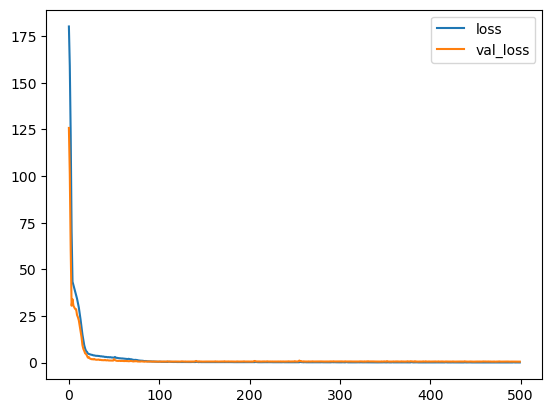

In [20]:
loss.plot()

In [21]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

5/5 [==============================] - 0s 750us/step


In [22]:
mse_train = mean_squared_error(y_train, train_predictions)

mse_test = mean_squared_error(y_test, test_predictions)

print(f'MSE (Train): {mse_train}')
print(f'MSE (Test): {mse_test}')

MSE (Train): 0.08264912154433673
MSE (Test): 0.5223000539246411


In [23]:
newDistance = pd.DataFrame({"Average Speed (km/h)" : [15], "Calories Burned" : [1200], "Climb (m)" : [180], "Average Heart Rate (bpm)" : [160],
                          "Duration_Float" : [5500], "Type_Cycling": [False],"Type_Other":[False],"Type_Running": [True],"Type_Walking": [False]})

In [24]:
newDistance

,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Duration_Float,Type_Cycling,Type_Other,Type_Running,Type_Walking
0,15,1200,180,160,5500,False,False,True,False


In [25]:
newDistance = scaler.transform(newDistance.values.reshape(-1,9))

In [26]:
model.predict(newDistance)

1/1 [==============================] - 0s 11ms/step


array([[1415.9663]], dtype=float32)

In [27]:
newDistance2 = df.drop("Distance (km)",axis=1).iloc[2]

In [28]:
newDistance2

Duration                     4516
Average Speed (km/h)        10.37
Calories Burned             967.0
Climb (m)                     171
Average Heart Rate (bpm)    155.0
Type_Cycling                False
Type_Other                  False
Type_Running                 True
Type_Walking                False
Name: 2, dtype: object

In [29]:
newDistance2 = scaler.transform(newDistance2.values.reshape(-1,9))

In [30]:
forecastedData = model.predict(newDistance2)

1/1 [==============================] - 0s 11ms/step


In [31]:
print("actual data of [2]  ", df["Distance (km)"].iloc[2] )
print("forecasted data of [2] ",forecastedData)

actual data of [2]   13.01
forecasted data of [2]  [[12.7080555]]
